In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sagemaker
import boto3
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
import warnings, requests, zipfile, io
warnings.simplefilter('ignore')

In [2]:
#Github data link
url = 'https://github.com/The-Katz-School-at-Yeshiva-University/Auto.Mach.Learn/blob/main/M5%20Practical%20Challenge%20-%20Predictive%20Modeling%20in%20Python/Input%20data/Part%20B/train.csv?raw=true'

In [3]:
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.fillna(df.mean(), inplace=True)# Replace Age Nulls with Mean
df.loc[df["Cabin"].isnull(), 'Cabin'] = 'NA'# Replace Cabin Nulls with NA
df=df.dropna(axis=0,subset=['Embarked'])# Delete Embarked Nulls

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
#Reset the index
df = df.reset_index()
df = df.drop(['index'], axis=1)

## Treat Numerical Data

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


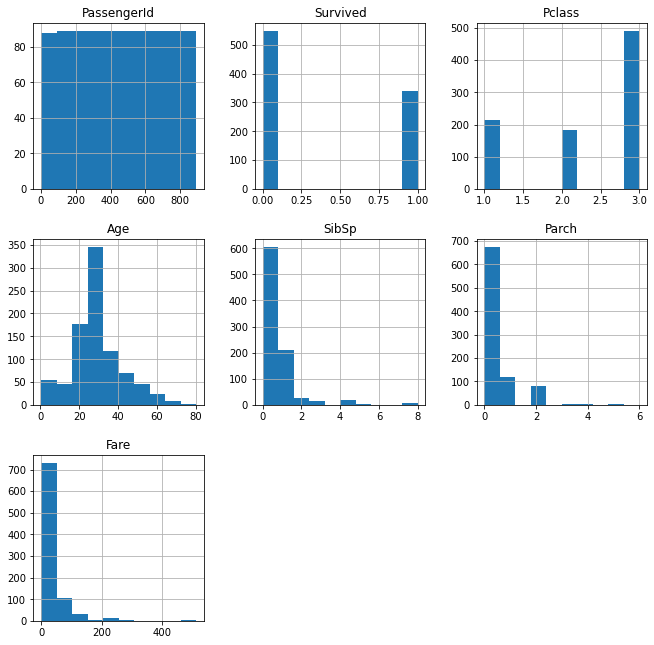

In [11]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")].index.values].hist(figsize=[11,11])
plt.show()

In [12]:
#Eliminate the PassengerId column
df=df.drop(['PassengerId'], axis=1)

In [13]:
minmax=MinMaxScaler()
partB_minmax=minmax.fit_transform(df[['Pclass','Age','SibSp','Parch',
                                            'Fare']])
df_minmax = pd.DataFrame(partB_minmax)
df['Pclass']=df_minmax[0]
df['Age']=df_minmax[1]
df['SibSp']=df_minmax[2]
df['Parch']=df_minmax[3]
df['Fare']=df_minmax[4]

### Treat Categorical Data

In [14]:
df[df.dtypes[(df.dtypes=="object")].index.values].columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [15]:
df[df.dtypes[(df.dtypes=="object")].index.values]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NA,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NA,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NA,S
...,...,...,...,...,...
884,"Montvila, Rev. Juozas",male,211536,NA,S
885,"Graham, Miss. Margaret Edith",female,112053,B42,S
886,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NA,S
887,"Behr, Mr. Karl Howell",male,111369,C148,C


In [16]:
#Eliminate the Name column
df=df.drop(['Name'], axis=1)
#Eliminate the Ticket column
df=df.drop(['Ticket'], axis=1)

In [17]:
#Return the list of Letter, of the Cabins
def get_cabin_letter(cabin_string):
    splits=cabin_string.split(" ")
    res=set()
    for i in splits:
        if(i=="NA"):
            res.add(i)
        else:
            res.add(i[0])
    x=', '.join(res)
    return x

In [18]:
#Apply the changes
df['Cabin']= df.apply(lambda elem: get_cabin_letter(elem['Cabin']),axis=1)

In [19]:
#One hot Encoding on Sex, Cabin_Letter and Embarked
df=pd.get_dummies(df, columns=['Sex', 'Cabin', 'Embarked'], prefix=['Sex', 'Cabin', 'Embarked'] )

In [20]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Cabin_E,Cabin_F,"Cabin_F, E","Cabin_F, G",Cabin_G,Cabin_NA,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,1.0,0.271174,0.125,0.000000,0.014151,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0.0,0.472229,0.125,0.000000,0.139136,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1.0,0.321438,0.000,0.000000,0.015469,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,0.0,0.434531,0.125,0.000000,0.103644,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1.0,0.434531,0.000,0.000000,0.015713,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,0.5,0.334004,0.000,0.000000,0.025374,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
885,1,0.0,0.233476,0.000,0.000000,0.058556,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
886,0,1.0,0.367921,0.125,0.333333,0.045771,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
887,1,0.0,0.321438,0.000,0.000000,0.058556,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Splitting the data

In [21]:
train, test_and_validate = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Survived'])
test, validate = train_test_split(test_and_validate, test_size=0.5, random_state=42, stratify=test_and_validate['Survived'])

In [22]:
print(train.shape)
print(test.shape)
print(validate.shape)

(711, 22)
(89, 22)
(89, 22)


In [23]:
print(train['Survived'].value_counts())
print(test['Survived'].value_counts())
print(validate['Survived'].value_counts())

0    439
1    272
Name: Survived, dtype: int64
0    55
1    34
Name: Survived, dtype: int64
0    55
1    34
Name: Survived, dtype: int64


## Uploading the data to Amazon S3

In [29]:
bucket=sagemaker.Session().default_bucket()

prefix='demo-sagemaker-xgboost-titanic-prediction'

train_file='titanic_train.csv'
test_file='titanic_test.csv'
validate_file='titanic_validate.csv'

import os

s3_resource = boto3.Session().resource('s3')
def upload_s3_csv(filename, folder, dataframe):
    csv_buffer = io.StringIO()
    dataframe.to_csv(csv_buffer, header=False, index=False)
    s3_resource.Bucket(bucket).Object(os.path.join(prefix, folder, filename)).put(Body=csv_buffer.getvalue())

In [30]:
upload_s3_csv(train_file, 'train', train)
upload_s3_csv(test_file, 'test', test)
upload_s3_csv(validate_file, 'validate', validate)

# Training the model

In [31]:
from sagemaker.image_uris import retrieve
container = retrieve('xgboost',boto3.Session().region_name,'1.0-1')

In [32]:
hyperparams={"num_round":"42",
             "eval_metric": "auc",
             "objective": "binary:logistic"}

In [33]:
s3_output_location="s3://{}/{}/output/".format(bucket,prefix)
xgb_model=sagemaker.estimator.Estimator(container,
                                       sagemaker.get_execution_role(),
                                       instance_count=1,
                                       instance_type='ml.m4.xlarge',
                                       output_path=s3_output_location,
                                        hyperparameters=hyperparams,
                                        sagemaker_session=sagemaker.Session())

In [34]:
train_channel = sagemaker.inputs.TrainingInput(
    "s3://{}/{}/train/".format(bucket,prefix,train_file),
    content_type='text/csv')

validate_channel = sagemaker.inputs.TrainingInput(
    "s3://{}/{}/validate/".format(bucket,prefix,validate_file),
    content_type='text/csv')

data_channels = {'train': train_channel, 'validation': validate_channel}

In [35]:
xgb_model.fit(inputs=data_channels, logs=False)


2021-12-09 21:37:39 Starting - Starting the training job...
2021-12-09 21:37:58 Starting - Launching requested ML instances................
2021-12-09 21:39:22 Starting - Preparing the instances for training...................
2021-12-09 21:41:02 Downloading - Downloading input data..
2021-12-09 21:41:19 Training - Downloading the training image........
2021-12-09 21:42:02 Training - Training image download completed. Training in progress.
2021-12-09 21:42:08 Uploading - Uploading generated training model.
2021-12-09 21:42:20 Completed - Training job completed


# Performing a batch transform

In [40]:
batch_X = test.iloc[:,1:];
batch_X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,...,Cabin_E,Cabin_F,"Cabin_F, E","Cabin_F, G",Cabin_G,Cabin_NA,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
697,0.0,0.610455,0.125,0.166667,0.216430,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
633,1.0,0.107816,0.375,0.333333,0.054457,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
510,1.0,0.367921,0.000,0.000000,0.015713,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
866,1.0,0.367921,0.000,0.000000,0.018543,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
751,1.0,0.409399,0.000,0.000000,0.018543,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [41]:
batch_X_file='batch-in.csv'
upload_s3_csv(batch_X_file, 'batch-in', batch_X)

In [42]:
batch_output = "s3://{}/{}/batch-out/".format(bucket,prefix)
batch_input = "s3://{}/{}/batch-in/{}".format(bucket,prefix,batch_X_file)

xgb_transformer = xgb_model.transformer(instance_count=1,
                                       instance_type='ml.m4.xlarge',
                                       strategy='MultiRecord',
                                       assemble_with='Line',
                                       output_path=batch_output)

xgb_transformer.transform(data=batch_input,
                         data_type='S3Prefix',
                         content_type='text/csv',
                         split_type='Line')
xgb_transformer.wait()

..................................[2021-12-09:22:01:38:INFO] No GPUs detected (normal if no gpus installed)
[2021-12-09:22:01:38:INFO] No GPUs detected (normal if no gpus installed)
[2021-12-09:22:01:38:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;
  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }
  server {
    listen 8080 deferred;
    client_max_body_size 0;
    keepalive_timeout 3;
    location ~ ^/(ping|invocations|execution-parameters) {
      proxy_set_header X-Forwarded-For $proxy_add_x_forwarded_for;
      proxy_set_header Host $http_host;
      proxy_redirect off;
      proxy_read_timeout 60s;
      proxy_pass http://gunicorn;
    }
    location / {
      return 404 "{}";
    }
  }
}
[2021-12-09 22:01:38 +0000] [18] [INFO] Starting g

In [43]:
s3 = boto3.client('s3')
obj = s3.get_object(Bucket=bucket, Key="{}/batch-out/{}".format(prefix,'batch-in.csv.out'))
target_predicted = pd.read_csv(io.BytesIO(obj['Body'].read()),',',names=['class'])
target_predicted.head(5)

,class
0,0.708800
1,0.009610
2,0.092547
3,0.205372
4,0.194148


In [44]:
def binary_convert(x):
    threshold = 0.65
    if x > threshold:
        return 1
    else:
        return 0

target_predicted['binary'] = target_predicted['class'].apply(binary_convert)

print(target_predicted.head(10))
test.head(10)

      class  binary
0  0.708800       1
1  0.009610       0
2  0.092547       0
3  0.205372       0
4  0.194148       0
5  0.403895       0
6  0.125653       0
7  0.188399       0
8  0.021061       0
9  0.101677       0


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Cabin_E,Cabin_F,"Cabin_F, E","Cabin_F, G",Cabin_G,Cabin_NA,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
697,0,0.0,0.610455,0.125,0.166667,0.216430,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
633,0,1.0,0.107816,0.375,0.333333,0.054457,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
510,0,1.0,0.367921,0.000,0.000000,0.015713,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
866,0,1.0,0.367921,0.000,0.000000,0.018543,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
751,0,1.0,0.409399,0.000,0.000000,0.018543,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
61,0,0.0,0.560191,0.125,0.000000,0.162932,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
400,0,1.0,0.321438,0.000,0.000000,0.015713,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
350,0,0.0,0.367921,0.000,0.000000,0.068315,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
862,0,0.5,0.296306,0.000,0.000000,0.025374,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
159,0,1.0,0.547625,0.000,0.166667,0.031425,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


# Creating a confusion matrix

In [45]:
test_labels = test.iloc[:,0]
test_labels.head()

697    0
633    0
510    0
866    0
751    0
Name: Survived, dtype: int64

In [47]:

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_labels, target_predicted['binary'])
df_confusion = pd.DataFrame(matrix, index=['Nnormal','Abnormal'],columns=['Normal','Abnormal'])

df_confusion

,Normal,Abnormal
Nnormal,50,5
Abnormal,10,24


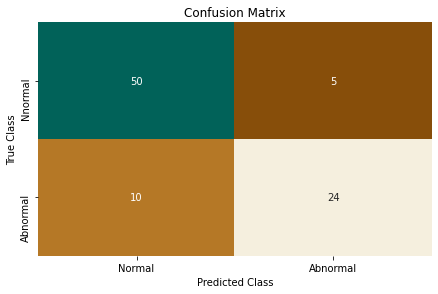

In [48]:
import seaborn as sns

colormap = sns.color_palette("BrBG", 10)
sns.heatmap(df_confusion, annot=True, cbar=None, cmap=colormap)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

# Calculating the AUC-ROC Curve

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
test_labels = test.iloc[:,0];
print("Validation AUC", roc_auc_score(test_labels, target_predicted['binary'] ) )

Validation AUC 0.8074866310160428


Figure(432x288)


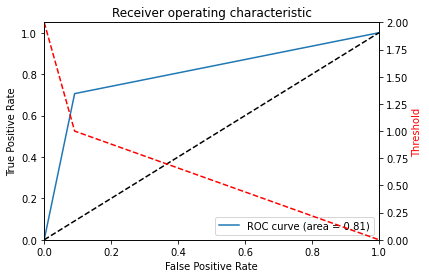

<Figure size 432x288 with 0 Axes>

In [53]:
fpr, tpr, thresholds = roc_curve(test_labels, target_predicted['binary'] )
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
 
# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]])

print(plt.figure())